In [1]:
import acquire as a
import unicodedata
import re
import json
import wrangle as w
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import ttest_ind
import pandas as pd
import acquire
from time import strftime
import warnings
warnings.filterwarnings('ignore')
import env 
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import  chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
train, validate, test = w.wrangle_readmes()

Returning Python and Java-script data


In [3]:
train


,Unnamed: 0,repo_name,url,language,readme_content,cleaned_content,lemmatized
88,88,localstack/localstack,https://github.com/localstack/localstack/blob/...,Python,⚡ We are thrilled to announce LocalStack 2.2 w...,we are thrilled to announce localstack 22 whi...,thrilled announce localstack 22 brings new fea...
4,4,zero-to-mastery/start-here-guidelines,https://github.com/zero-to-mastery/start-here-...,Python,One rule of this community:We don't care if yo...,one rule of this communitywe don't care if you...,one rule communitywe care break thing playgrou...
13,13,bettiolo/node-echo,https://github.com/bettiolo/node-echo/blob/mas...,JavaScript,"node-echonode.js echo server, returns request ...",nodeechonodejs echo server returns request dat...,nodeechonodejs echo server return request data...
10,10,chartjs/Chart.js,https://github.com/chartjs/Chart.js/blob/maste...,JavaScript,Simple yet flexible JavaScript cha...,simple yet flexible javascript cha...,simple yet flexible javascript charting design...
81,81,gulpjs/gulp,https://github.com/gulpjs/gulp/blob/master/REA...,JavaScript,The streaming build system Wh...,the streaming build system wh...,streaming build system gulpautomation gulp too...
...,...,...,...,...,...,...,...
32,32,learn-co-curriculum/phase-1-scope-lab,https://github.com/learn-co-curriculum/phase-1...,JavaScript,Scope LabLearning GoalsUnderstand how function...,scope lablearning goalsunderstand how function...,scope lablearning goalsunderstand function det...
80,80,swisskyrepo/PayloadsAllTheThings,https://github.com/swisskyrepo/PayloadsAllTheT...,Python,Payloads All The ThingsA list of useful payloa...,payloads all the thingsa list of useful payloa...,payload thingsa list useful payload bypass web...
21,21,keras-team/keras,https://github.com/keras-team/keras/blob/maste...,Python,Keras: Deep Learning for humansThis repository...,keras deep learning for humansthis repository ...,kera deep learning humansthis repository host ...
84,84,miguelgrinberg/flasky,https://github.com/miguelgrinberg/flasky/blob/...,Python,FlaskyThis repository contains the source code...,flaskythis repository contains the source code...,flaskythis repository contains source code exa...


In [4]:
python_words =  " ".join(train[train.language == 'Python'].lemmatized)
javascript_words =  " ".join(train[train.language == 'JavaScript'].lemmatized)
all_words = " ".join(train.lemmatized)


In [5]:


def generate_bigrams(lemmatized):
    words = lemmatized.split()
    bigrams = []

    if len(words) < 2:
        return bigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            bigram = " ".join(words[i:i+2])
            bigrams.append(bigram)

    return bigrams



In [6]:
all_text = all_words
python_text = python_words
javascript_text = javascript_words

In [7]:
all_bigrams = generate_bigrams(all_text)
python_bigrams = generate_bigrams(python_text)
javascript_bigrams = generate_bigrams(javascript_text)

In [8]:
all_df = pd.DataFrame({'All Bigrams': all_bigrams})
python_df = pd.DataFrame({'Python Bigrams': python_bigrams})
javascript_df = pd.DataFrame({'JavaScript Bigrams': javascript_bigrams})

In [9]:
python_df

,Python Bigrams
0,thrilled announce
1,announce localstack
2,localstack 22
3,22 brings
4,brings new
...,...
64615,edition book
64616,book moved
64617,moved different
64618,different repository


In [10]:
all_df

,All Bigrams
0,thrilled announce
1,announce localstack
2,localstack 22
3,22 brings
4,brings new
...,...
84266,appsfind morewebsiteguidesapicommunityblogbuil...
84267,morewebsiteguidesapicommunityblogbuildscontrib...
84268,contributingmdcrossbrowser testing
84269,testing provided


In [11]:
all_freq = all_df['All Bigrams'].value_counts()
python_freq = python_df['Python Bigrams'].value_counts()
javascript_freq = javascript_df['JavaScript Bigrams'].value_counts()

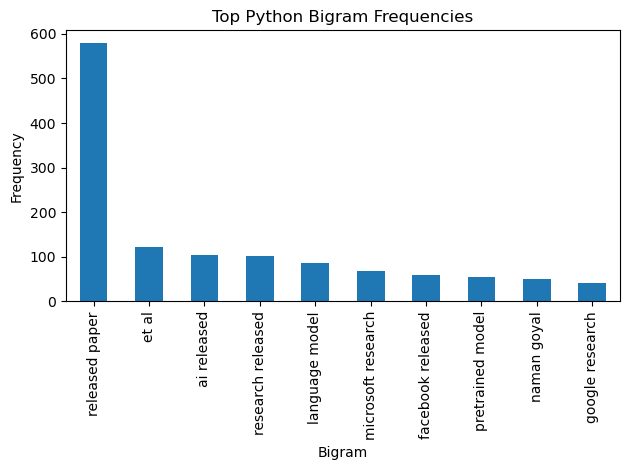

In [13]:
top_python_freq = python_freq.head(10)
top_python_freq.plot(kind='bar', title='Top Python Bigram Frequencies')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
top_python_freq

released paper        579
et al                 121
ai released           105
research released     102
language model         85
microsoft research     67
facebook released      60
pretrained model       54
naman goyal            51
google research        42
Name: Python Bigrams, dtype: int64

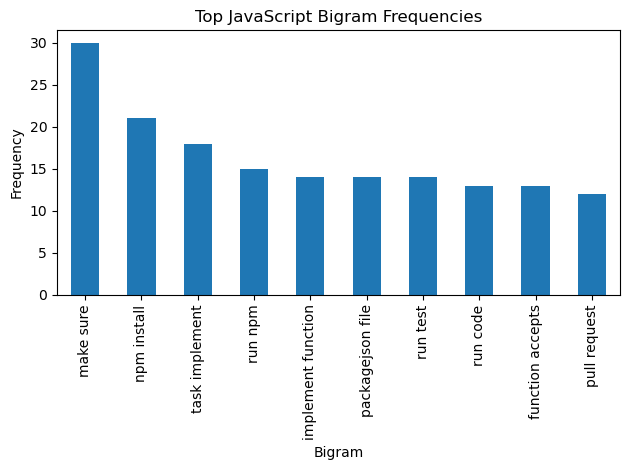

In [15]:
top_javascript_freq = javascript_freq.head(10)
top_javascript_freq.plot(kind='bar', title='Top JavaScript Bigram Frequencies')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
top_javascript_freq

make sure             30
npm install           21
task implement        18
run npm               15
implement function    14
packagejson file      14
run test              14
run code              13
function accepts      13
pull request          12
Name: JavaScript Bigrams, dtype: int64

In [ ]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as a
from collections import Counter


all_cloud = WordCloud(background_color='white', height=1000, width=400).generate((all_words))
python_cloud = WordCloud(background_color='white', height=600, width=800).generate((python_words))
javascript_cloud = WordCloud(background_color='white', height=600, width=800).generate((javascript_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(python_cloud)
axs[2].imshow(javascript_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Python')
axs[2].set_title('Javascript')

for ax in axs: ax.axis('off')

In [ ]:
python_bigrams = generate_bigrams(python_text)
javascript_bigrams = generate_bigrams(javascript_text)

In [ ]:
python_bigrams_set = set(python_bigrams)
javascript_bigrams_set = set(javascript_bigrams)

In [ ]:
overlap_bigrams = python_bigrams_set.intersection(javascript_bigrams_set)

In [ ]:
overlap_bigrams

In [ ]:
word_counts = (pd.concat([all_freq, python_freq, javascript_freq], axis=1, sort=True)
                .set_axis(['all', 'python', 'javascript'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


In [ ]:
word_counts.sort_values(by='all', ascending=False).head(10)


In [ ]:
pd.concat([word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.javascript == 0].sort_values(by='javascript').tail(6)])


In [ ]:
(word_counts
 .assign(javascript=word_counts.javascript / word_counts['all'],
         python=word_counts.python / word_counts['all'])
 .sort_values(by='all')
 [['python', 'javascript']]
 .tail(20)
 .sort_values('javascript')
 .plot.barh(stacked=True))

plt.title('Proportion of python vs javascript for the 20 most common words')
